In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from statsmodels.discrete.discrete_model import Probit

import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
def del_dup_col(df, p):
    
    # 모든 행이 0인 열과 모든 행의 일치율이 p이상인 열(중복 열) 제거
    
    # 모든 행이 0인 열 제거(62개의 열)
    del_list = []
    for i in range(df.shape[1]):
        if df.iloc[:,i].mean() == 0:
            del_list.append(i)
    result_df = df.drop(df.columns[del_list], axis='columns')
    
    # 모든 행의 일치율이 p이상인 열(중복 열) 제거(62개의 열)
    # p = 0.1인 경우 206개의 열 제거
    del_list = []
    for i in range(result_df.shape[1]):
        for j in range(i+1, result_df.shape[1]):
            if (result_df.iloc[:,i] == result_df.iloc[:,j]).value_counts(normalize=True)[False] < p:
                del_list.append(i)
    del_list = list(set(del_list))
    result_df2 = result_df.drop(result_df.columns[del_list], axis='columns')
    
    return result_df2

In [3]:
lcd = pd.read_stata('lendingclub.dta')

In [4]:
col_del_list = ['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp', 'funded_amnt', 
                'total_rec_late_fee', 'last_pymnt_amnt', 'funded_amnt_inv', 'recoveries', 'collection_recovery_fee',
               'last_fico_range_high', 'last_fico_range_low']

In [5]:
for i in list(lcd.columns):
    check = ""
    if list(lcd[i].value_counts(normalize=True))[0]*100 > 99.5: # 99.5 % 이상
        check = "   <<< del"
        col_del_list.append(i)
    print("{0} : {1:0.3f}%{2}".format(i, list(lcd[i].value_counts(normalize=True))[0]*100, check))
col_del_list = list(set(col_del_list))

loan_amnt : 7.638%
funded_amnt : 7.638%
funded_amnt_inv : 7.220%
int_rate : 3.353%
installment : 0.301%
annual_inc : 3.848%
dti : 0.076%
delinq_2yrs : 79.637%
fico_range_low : 9.524%
fico_range_high : 9.524%
inq_last_6mths : 58.169%
open_acc : 8.953%
pub_rec : 82.592%
revol_bal : 0.280%
revol_util : 0.344%
total_acc : 3.652%
out_prncp : 99.984%   <<< del
out_prncp_inv : 99.984%   <<< del
total_pymnt : 0.039%
total_pymnt_inv : 0.039%
total_rec_prncp : 6.452%
total_rec_int : 0.093%
total_rec_late_fee : 95.343%
recoveries : 87.277%
collection_recovery_fee : 87.748%
last_pymnt_amnt : 0.252%
last_fico_range_high : 3.046%
last_fico_range_low : 3.046%
collections_12_mths_ex_med : 98.366%
acc_now_delinq : 99.453%
tot_coll_amt : 84.442%
tot_cur_bal : 0.015%
chargeoff_within_12_mths : 99.154%
delinq_amnt : 99.574%   <<< del
pub_rec_bankruptcies : 87.798%
tax_liens : 96.294%
emp_length1 : 93.465%
emp_length2 : 66.978%
emp_length3 : 90.980%
emp_length4 : 92.012%
emp_length5 : 94.176%
emp_length6 :

mths_since_recent_bc_dlq4 : 97.394%
mths_since_recent_bc_dlq5 : 97.381%
mths_since_recent_bc_dlq6 : 97.431%
mths_since_recent_bc_dlq7 : 97.456%
mths_since_recent_bc_dlq8 : 97.648%
mths_since_recent_bc_dlq9 : 97.441%
mths_since_recent_bc_dlq10 : 97.517%
mths_since_recent_bc_dlq11 : 97.534%
mths_since_recent_inq1 : 89.366%
mths_since_recent_inq2 : 82.095%
mths_since_recent_inq3 : 84.747%
mths_since_recent_inq4 : 93.411%
mths_since_recent_inq5 : 94.133%
mths_since_recent_inq6 : 89.767%
mths_since_recent_inq7 : 91.787%
mths_since_recent_inq8 : 90.954%
mths_since_recent_inq9 : 91.951%
mths_since_recent_inq10 : 91.789%
mths_since_recent_revol_delinq1 : 64.494%
mths_since_recent_revol_delinq2 : 96.162%
mths_since_recent_revol_delinq3 : 96.195%
mths_since_recent_revol_delinq4 : 96.390%
mths_since_recent_revol_delinq5 : 96.546%
mths_since_recent_revol_delinq6 : 96.772%
mths_since_recent_revol_delinq7 : 96.424%
mths_since_recent_revol_delinq8 : 96.221%
mths_since_recent_revol_delinq9 : 96.639%
m

In [6]:
lcd.drop(col_del_list, axis=1, inplace=True)

In [7]:
lcd2 = del_dup_col(lcd, 0.05)
lcd2

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,19000,0.0916,605.62,65000.0,16.36,1,670,674,0,10,...,0,1,0,0,0,0,0,0,0,0
1,10000,0.0789,312.86,58000.0,5.03,0,690,694,1,5,...,0,0,0,0,0,0,0,0,0,0
2,6000,0.1147,197.78,46900.0,24.23,2,665,669,1,9,...,1,0,0,0,0,0,0,0,0,0
3,25200,0.1199,836.89,76280.0,32.87,0,685,689,0,5,...,0,0,0,0,0,0,0,0,0,0
4,8000,0.1299,269.52,29000.0,20.28,0,770,774,1,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092914,24000,0.1199,797.03,79000.0,3.90,0,660,664,1,5,...,0,0,0,0,1,0,0,0,0,0
1092915,10000,0.1199,332.10,31000.0,28.69,0,670,674,0,9,...,0,0,0,0,0,0,0,0,0,0
1092916,12000,0.1999,317.86,64400.0,27.19,1,695,699,2,17,...,0,0,0,0,0,0,0,0,0,0
1092917,13000,0.1599,316.07,35000.0,30.90,0,680,684,0,9,...,0,0,0,0,0,0,0,0,0,0


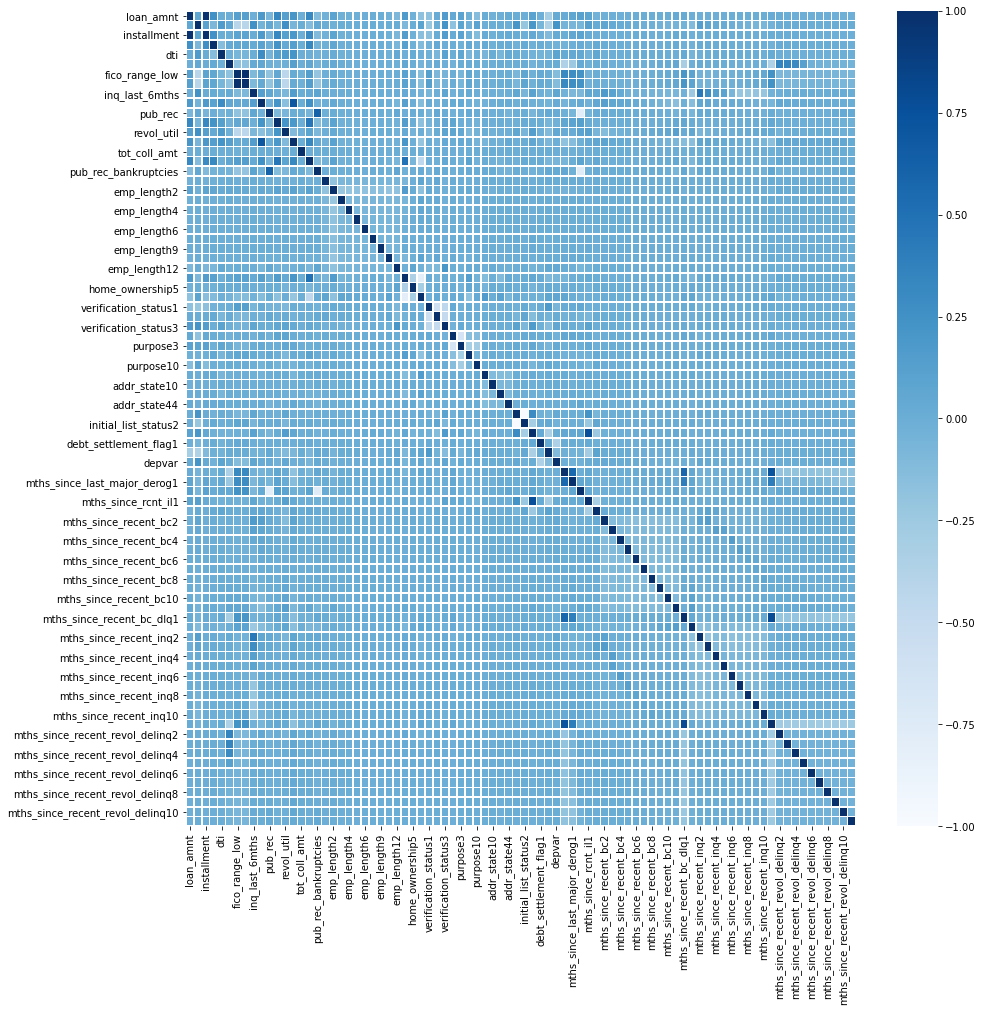

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(lcd2.corr(), linewidths=.5, cmap='Blues')
plt.show()

In [30]:
predictor = lcd2.depvar
variables = lcd2.drop('depvar', axis=1)

x_train, x_test, y_train, y_test = train_test_split(variables, predictor)
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [31]:
model1 = sm.OLS(y_train, sm.add_constant(x_train))
result1 = model1.fit()
pred_m1 = result1.predict(sm.add_constant(x_test))
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depvar   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2225.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:04:56   Log-Likelihood:            -2.6514e+05
No. Observations:              819689   AIC:                         5.304e+05
Df Residuals:                  819609   BIC:                         5.314e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4405      0.064      6.901      0.000       0.315       0.566
loan_amnt                        -7.386e-06   4.51e-07    -16.374      0.000   -8.27e-06    -6.5e-06
int_rate                             1.0960      0.015     73.326      0.000       1.067       1.125
installment                          0.0003   1.37e-05     19.299      0.000       0.000       0.000
annual_inc                       -1.079e-08   4.14e-09     -2.609      0.009   -1.89e-08   -2.68e-09
dti                                  0.0019   5.09e-05     36.678      0.000       0.002       0.002
delinq_2yrs                          0.0037      0.001      6.763      0.000       0.003       0.005
fico_range_low                      -0.0694      0.032     -2.171      0.030      -0.132      -0.007
fico_range_high                      0.0690      0.032      2.159      0.031       0.006       0.132
inq_last_6mths                       0.0058      0.001     10.269      0.000       0.005       0.007
open_acc                             0.0015      0.000     14.711      0.000       0.001       0.002
pub_rec                              0.0012      0.001      1.262      0.207      -0.001       0.003
revol_bal                        -1.793e-07   1.97e-08     -9.088      0.000   -2.18e-07   -1.41e-07
revol_util                          -0.0124      0.002     -5.926      0.000      -0.016      -0.008
total_acc                           -0.0009   4.81e-05    -18.194      0.000      -0.001      -0.001
tot_coll_amt                     -2.228e-08   3.57e-08     -0.624      0.533   -9.23e-08    4.77e-08
tot_cur_bal                      -4.733e-08    3.3e-09    -14.337      0.000   -5.38e-08   -4.09e-08
pub_rec_bankruptcies                -0.0009      0.002     -0.605      0.545      -0.004       0.002
emp_length1                         -0.0030      0.002     -1.552      0.121      -0.007       0.001
emp_length2                         -0.0082      0.001     -5.709      0.000      -0.011      -0.005
emp_length3                         -0.0041      0.002     -2.328      0.020      -0.008      -0.001
emp_length4                         -0.0036      0.002     -1.971      0.049      -0.007   -2.05e-05
emp_length5                         -0.0043      0.002     -2.159      0.031      -0.008      -0.000
emp_length6                         -0.0041      0.002     -2.067      0.039      -0.008      -0.000
emp_length7                         -0.0031      0.002     -1.443      0.149      -0.007       0.001
emp_length9                         -0.0003      0.002     -0.140      0.888      -0.004       0.004
emp_length11                        -0.0010      0.002     -0.522      0.602      -0.005       0.003
emp_length12                         0.0486      0.00

In [33]:
result2 = sm.Logit(y_train, sm.add_constant(x_train)).fit(disp=False)
pred_m2 = result2.predict(sm.add_constant(x_test))
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 depvar   No. Observations:               819689
Model:                          Logit   Df Residuals:                   819608
Method:                           MLE   Df Model:                           80
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.1670
Time:                        12:05:26   Log-Likelihood:            -3.0250e+05
converged:                      False   LL-Null:                   -3.6316e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.8177   1.42e+04      0.000      1.000   -2.78e+04    2.78e+04
loan_amnt                        -1.984e-05   3.59e-06     -5.522      0.000   -2.69e-05   -1.28e-05
int_rate                             8.9172      0.123     72.490      0.000       8.676       9.158
installment                          0.0010      0.000      9.504      0.000       0.001       0.001
annual_inc                       -8.186e-07   1.02e-07     -8.041      0.000   -1.02e-06   -6.19e-07
dti                                  0.0168      0.000     36.293      0.000       0.016       0.018
delinq_2yrs                          0.0312      0.004      6.961      0.000       0.022       0.040
fico_range_low                      -0.6794      0.462     -1.472      0.141      -1.584       0.225
fico_range_high                      0.6732      0.462      1.458      0.145      -0.231       1.578
inq_last_6mths                       0.0416      0.005      9.006      0.000       0.033       0.051
open_acc                             0.0152      0.001     16.378      0.000       0.013       0.017
pub_rec                              0.0108      0.007      1.453      0.146      -0.004       0.025
revol_bal                         -2.89e-06   2.62e-07    -11.047      0.000    -3.4e-06   -2.38e-06
revol_util                          -0.0325      0.019     -1.719      0.086      -0.069       0.005
total_acc                           -0.0079      0.000    -18.154      0.000      -0.009      -0.007
tot_coll_amt                     -2.488e-06   1.78e-06     -1.400      0.161   -5.97e-06    9.95e-07
tot_cur_bal                      -5.702e-07   3.61e-08    -15.814      0.000   -6.41e-07      -5e-07
pub_rec_bankruptcies                -0.0176      0.013     -1.378      0.168      -0.043       0.007
emp_length1                         -0.0261      0.017     -1.516      0.130      -0.060       0.008
emp_length2                         -0.0734      0.013     -5.686      0.000      -0.099      -0.048
emp_length3                         -0.0359      0.016     -2.265      0.024      -0.067      -0.005
emp_length4                         -0.0317      0.016     -1.942      0.052      -0.064       0.000
emp_length5                         -0.0386      0.018     -2.165      0.030      -0.074      -0.004
emp_length6                         -0.0340      0.018     -1.937      0.053      -0.068       0.000
emp_length7                         -0.0270      0.019     -1.414      0.157      -0.064       0.010
emp_length9                         -0.0021      0.019     -0.112      0.911      -0.040       0.035
emp_length11                        -0.0073      0.016     -0.443      0.658      -0.040       0.025
emp_length12                         0.3777      0.017     22.167      0.000       0.344       0.411
home_ownership2                      0.1885      0.179      1.053      0.292      -0.162       0.539
home_owne

In [35]:
result3 = Probit(y_train, sm.add_constant(x_train)).fit(method='bfgs', disp=False)
pred_m3 = result3.predict(sm.add_constant(x_test))
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                 depvar   No. Observations:               819689
Model:                         Probit   Df Residuals:                   819608
Method:                           MLE   Df Model:                           80
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.1553
Time:                        12:05:42   Log-Likelihood:            -3.0674e+05
converged:                      False   LL-Null:                   -3.6316e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2401        nan        nan        nan         nan         nan
loan_amnt                           -0.0001        nan        nan        nan         nan         nan
int_rate                             0.4979        nan        nan        nan         nan         nan
installment                          0.0041        nan        nan        nan         nan         nan
annual_inc                       -4.013e-07        nan        nan        nan         nan         nan
dti                                  0.0095        nan        nan        nan         nan         nan
delinq_2yrs                          0.0277        nan        nan        nan         nan         nan
fico_range_low                      -0.4796        nan        nan        nan         nan         nan
fico_range_high                      0.4798        nan        nan        nan         nan         nan
inq_last_6mths                       0.0521        nan        nan        nan         nan         nan
open_acc                             0.0124        nan        nan        nan         nan         nan
pub_rec                              0.0097        nan        nan        nan         nan         nan
revol_bal                         -2.17e-06        nan        nan        nan         nan         nan
revol_util                           0.4272        nan        nan        nan         nan         nan
total_acc                           -0.0058        nan        nan        nan         nan         nan
tot_coll_amt                       2.57e-06        nan        nan        nan         nan         nan
tot_cur_bal                      -3.698e-07        nan        nan        nan         nan         nan
pub_rec_bankruptcies                 0.0505        nan        nan        nan         nan         nan
emp_length1                          0.0023        nan        nan        nan         nan         nan
emp_length2                         -0.0403        nan        nan        nan         nan         nan
emp_length3                         -0.0022        nan        nan        nan         nan         nan
emp_length4                         -0.0037        nan        nan        nan         nan         nan
emp_length5                         -0.0128        nan        nan        nan         nan         nan
emp_length6                         -0.0146        nan        nan        nan         nan         nan
emp_length7                         -0.0120        nan        nan        nan         nan         nan
emp_length9                          0.0015        nan        nan        nan         nan         nan
emp_length11                         0.0151        nan        nan        nan         nan         nan
emp_length12                         0.2728        nan        nan        nan         nan         nan
home_ownership2                      0.0086        nan        nan        nan         nan         nan
home_owne

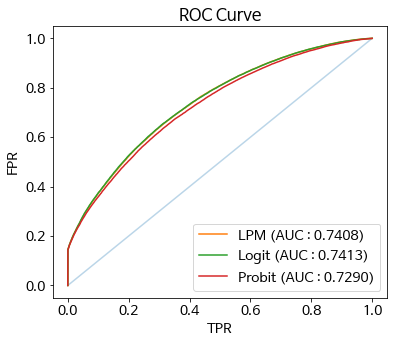

In [62]:
# 각 모형(LPM, Logit, Probit)에 대한 ROC Curve와 각각의 AUC

plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['font.size'] = 14

fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_m1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_m2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred_m3)
plt.plot([0,1], [0,1], alpha=0.3)
plt.plot(fpr1, tpr1, label='LPM (AUC : {0:0.4f})'.format(roc_auc_score(y_test, pred_m1)))
plt.plot(fpr2, tpr2, label='Logit (AUC : {0:0.4f})'.format(roc_auc_score(y_test, pred_m2)))
plt.plot(fpr3, tpr3, label='Probit (AUC : {0:0.4f})'.format(roc_auc_score(y_test, pred_m3)))

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC Curve')
plt.legend()

plt.show()

0.0 -11734564.31478856
0.01 -11554753.440950654
0.02 -11347983.263242627
0.03 -11110765.22570063
0.04 -10807714.537958728
0.05 -10488835.154728947
0.06 -10137521.486193096
0.07 -9735529.751939232
0.08 -9287561.74637742
0.09 -8849286.215307424
0.1 -8372163.38355742
0.11 -7870520.173373421
0.12 -7370008.867107317
0.13 -6851251.979047212
0.14 -6348084.361015258
0.15 -5961542.147747231
0.16 -5527235.954531284
0.17 -5165581.772051202
0.18 -4873841.110961134
0.19 -4587128.546945114
0.2 -4418020.94939911
0.21 -4294171.224387065
0.22 -4197704.593557043
0.23 -4140244.883321073
0.24 -4073334.8314750753
0.25 -4037628.22070908
0.26 -4047434.0277031055
0.27 -4052683.7184090926
0.28 -4154645.173131099
0.29 -4202876.666871125
0.3 -4230302.728697106
0.31 -4247631.803555132
0.32 -4313093.352253135
0.33 -4335173.208349177
0.34 -4370490.197975181
0.35000000000000003 -4413990.9893312035
0.36 -4464294.931315171
0.37 -4503354.866745193
0.38 -4566474.420971198
0.39 -4599362.260039197
0.4 -4619775.816211211
0

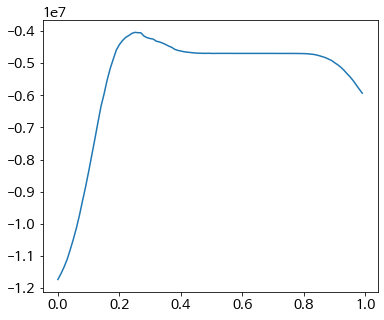

In [53]:
# LPM, Logit, Probit Model에 대한 profit을 최대로 하는 optimal thresholds 검색
# 수익(profit) = TN * (installment * int_rate) - FN * (installment) - FP * (installment * int_rate)
x_xx1 = []
y_yy1 = []
for i in np.linspace(0, 0.99, 100):
    x_xx1.append(i)
    check = [1 if j >= i else 0 for j in pred_m1]
    total_loss1 = 0
    for j in range(len(pred_m1)):
        if check[j] == 0 and y_test.iloc[j] == 1:
            total_loss1 -= x_test['installment'].iloc[j]
        if check[j] == 0 and y_test.iloc[j] == 0:DD
            total_loss1 += x_test['installment'].iloc[j] * x_test['int_rate'].iloc[j]
        if check[j] == 1 and y_test.iloc[j] == 0:
            total_loss1 -= x_test['installment'].iloc[j] * x_test['int_rate'].iloc[j]
    y_yy1.append(total_loss1)
    print(i, total_loss1)
plt.plot(x_xx1, y_yy1)

0.0 -12165944.855426565
0.01 -12156641.84949255
0.02 -12097031.744630557
0.03 -11870899.850076556
0.04 -11455494.381110627
0.05 -10896503.014234632
0.06 -10254206.515472965
0.07 -9576311.305051161
0.08 -8861360.630177377
0.09 -8186343.165927425
0.1 -7547348.578983401
0.11 -6914406.39654331
0.12 -6386769.996103229
0.13 -5889088.746531269
0.14 -5480428.665973278
0.15 -5131506.283149234
0.16 -4814505.30628114
0.17 -4597374.4169930965
0.18 -4398606.276229116
0.19 -4253526.175485031
0.2 -4145036.3836890487
0.21 -4104138.2591810417
0.22 -4063377.0826630285
0.23 -4045454.066021034
0.24 -4001022.907773048
0.25 -3969467.49906507
0.26 -3946556.6210090886
0.27 -3965717.1925870883
0.28 -3980378.401335086
0.29 -3983360.3342530807
0.3 -4016294.927909098
0.31 -4081045.9289011112
0.32 -4134796.881459117
0.33 -4154977.9988291296
0.34 -4188226.697959136
0.35000000000000003 -4223657.927069153
0.36 -4232748.31367312
0.37 -4260791.539899126
0.38 -4281760.982623135
0.39 -4310806.033163144
0.4 -4354457.03384

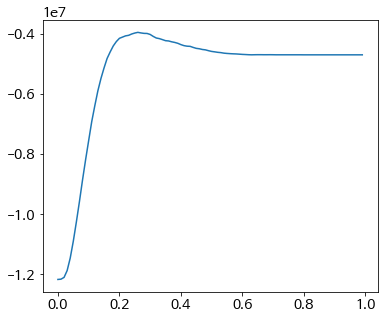

In [54]:
x_xx2 = []
y_yy2 = []
for i in np.linspace(0, 0.99, 100):
    x_xx2.append(i)
    check = [1 if j >= i else 0 for j in pred_m2]
    total_loss2 = 0
    for j in range(len(pred_m2)):
        if check[j] == 0 and y_test.iloc[j] == 1:
            total_loss2 -= x_test['installment'].iloc[j]
        if check[j] == 0 and y_test.iloc[j] == 0:
            total_loss2 += x_test['installment'].iloc[j] * x_test['int_rate'].iloc[j]
        if check[j] == 1 and y_test.iloc[j] == 0:
            total_loss2 -= x_test['installment'].iloc[j] * x_test['int_rate'].iloc[j]
    y_yy2.append(total_loss2)
    print(i, total_loss2)
plt.plot(x_xx2, y_yy2)

0.0 -12165944.855426565
0.01 -12135143.580160562
0.02 -12055123.893348558
0.03 -11839110.152620714
0.04 -11459734.053404758
0.05 -10976133.566332763
0.06 -10354516.831495017
0.07 -9711838.409185126
0.08 -9017633.664577173
0.09 -8314571.711495321
0.1 -7678219.356921409
0.11 -7071874.795221346
0.12 -6519149.338767268
0.13 -6030937.282031313
0.14 -5593456.792895355
0.15 -5240936.321379274
0.16 -4964408.825731199
0.17 -4717298.886715188
0.18 -4574458.830733148
0.19 -4424365.285643128
0.2 -4339547.541615094
0.21 -4259704.338031035
0.22 -4204453.800663046
0.23 -4154774.2836630573
0.24 -4124970.9221150693
0.25 -4085120.12605709
0.26 -4070983.9368190793
0.27 -4066065.986789081
0.28 -4053031.9877270744
0.29 -4105974.470653095
0.3 -4115988.5012491015
0.31 -4137681.613107111
0.32 -4198203.280593131
0.33 -4213670.506307114
0.34 -4217592.949347124
0.35000000000000003 -4246336.659301118
0.36 -4276226.765241107
0.37 -4296379.437049128
0.38 -4325508.189085159
0.39 -4362596.440813163
0.4 -4392517.68643

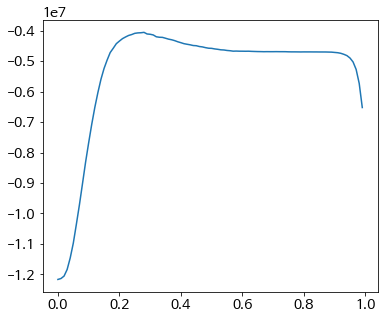

In [55]:
x_xx3 = []
y_yy3 = []
for i in np.linspace(0, 0.99, 100):
    x_xx3.append(i)
    check = [1 if j >= i else 0 for j in pred_m3]
    total_loss3 = 0
    for j in range(len(pred_m3)):
        if check[j] == 0 and y_test.iloc[j] == 1:
            total_loss3 -= x_test['installment'].iloc[j]
        if check[j] == 0 and y_test.iloc[j] == 0:
            total_loss3 += x_test['installment'].iloc[j] * x_test['int_rate'].iloc[j]
        if check[j] == 1 and y_test.iloc[j] == 0:
            total_loss3 -= x_test['installment'].iloc[j] * x_test['int_rate'].iloc[j]
    y_yy3.append(total_loss3)
    print(i, total_loss3)
plt.plot(x_xx3, y_yy3)

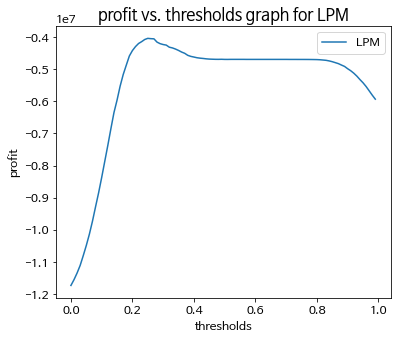

In [69]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['font.size'] = 12

plt.plot(x_xx1, y_yy1, label='LPM')

plt.xlabel('thresholds')
plt.ylabel('profit')
plt.title('profit vs. thresholds graph for LPM', size=16)
plt.legend()

plt.show()

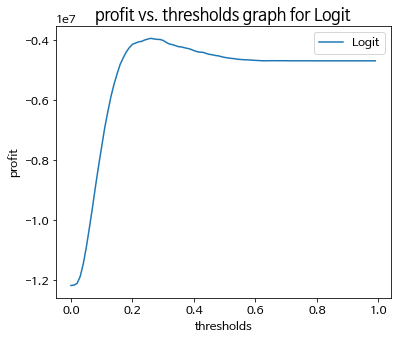

In [71]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['font.size'] = 12

plt.plot(x_xx2, y_yy2, label='Logit')

plt.xlabel('thresholds')
plt.ylabel('profit')
plt.title('profit vs. thresholds graph for Logit', size=16)
plt.legend()

plt.show()

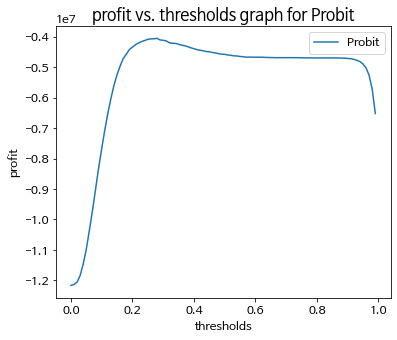

In [73]:
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['font.size'] = 12

plt.plot(x_xx3, y_yy3, label='Probit')

plt.xlabel('thresholds')
plt.ylabel('profit')
plt.title('profit vs. thresholds graph for Probit', size=16)
plt.legend()

plt.show()

In [74]:
check1 = [1 if j > 0.25  else 0 for j in pred_m1]
check2 = [1 if j > 0.26  else 0 for j in pred_m2]
check3 = [1 if j > 0.28  else 0 for j in pred_m3]
print("Accuracy for optimal thresholds (LPM) : {0:0.4f}".format(accuracy_score(y_test, check1)))
print("Accuracy for optimal thresholds (Logit) : {0:0.4f}".format(accuracy_score(y_test, check2)))
print("Accuracy for optimal thresholds (Probit) : {0:0.4f}".format(accuracy_score(y_test, check3)))

Accuracy for optimal thresholds (LPM) : 0.8252
Accuracy for optimal thresholds (Logit) : 0.8271
Accuracy for optimal thresholds (Probit) : 0.8350


In [12]:
def del_dup_col(df, p):
    
    # 모든 행이 0인 열과 모든 행의 일치율이 p이상인 열(중복 열) 제거
    
    # 모든 행이 0인 열 제거(62개의 열)
    del_list = []
    for i in range(df.shape[1]):
        if df.iloc[:,i].mean() == 0:
            del_list.append(i)
    result_df = df.drop(df.columns[del_list], axis='columns')
    
    # 모든 행의 일치율이 p이상인 열(중복 열) 제거(62개의 열)
    # p = 0.1인 경우 206개의 열 제거
    del_list = []
    for i in range(result_df.shape[1]):
        for j in range(i+1, result_df.shape[1]):
            if (result_df.iloc[:,i] == result_df.iloc[:,j]).value_counts(normalize=True)[False] < p:
                del_list.append(i)
    del_list = list(set(del_list))
    result_df2 = result_df.drop(result_df.columns[del_list], axis='columns')
    
    return result_df2

def corr_col_list(df, n):
    
    # 주어진 'depvar'에 대한 correlation 벡터를 절댓값 크기가 큰 순서대로 n개의 행 정렬
    
    abs_desc_cor = sorted(df, key=abs, reverse=True)
    
    col_list = ['depvar']
    for i in range(1, n):
        col_list.append(cor_dep[cor_dep == abs_desc_cor[i]].index.values[0])

    return col_list

def acc_rate(real_m, pred_m, p):
    
    # 예측 모형인 pred_m의 값이 p이상일 때 1, p이하일 때 0으로 반환한 set과 실제 test set인 real_m의 값의 일치율(accuracy)
    # p = thresholds

    check = [1 if j > p else 0 for j in pred_m]
    ac_score = accuracy_score(real_m, check)
    
    return ac_score

def max_acc_rate(real_m, pred_m):
    
    # thresolds인 p의 값을 0부터 1까지 4등분하여 각각의 값에 대하여 accuracy를 계산
    # 다시 주어진 값이 포함된 구간을 4등분하여 각각의 값에 대하여 accuracy를 계산하고 accuracy가 최댓값을 갖도록 rep_num 번 반복
    # 이 때 가장 큰 accuracy 값과 그 때의 thresholds인 p 값을 반환
    
    max = 0
    max_thre = 0
    a = 0
    b = 1
    rep_num = 10
    
    for i in range(rep_num):
        for i in np.linspace(a, b, 5):
            if acc_rate(real_m, pred_m, i) > max:
                max = acc_rate(real_m, pred_m, i)
                max_thre = i
        if max_thre <= a + (b-a)/4:
            a = a
            b = a + (b-a)/2
        elif max_thre == a + (b-a)/2:
            a = a + (b-a)/4
            b = a + 3*(b-a)/4
        else:
            a = a + (b-a)/2
            b = b
            
    return (max, max_thre)

In [13]:
# 모든 행이 0인 열과 모든 행의 일치율이 0.1 이상인 열(중복 열) 제거 후 65개의 variable을 갖는 데이터 셋을 얻음
# 65개의 variable을 갖는 데이터 셋의 correlation 행렬을 구함
lcd2 = del_dup_col(lcd, 0.1)
cor_dep = lcd2.corr()['depvar']

In [ ]:
# correlation의 값이 큰 순서대로 독립변수를 설정하고 
# 이 때의 각각의 경우에 대한 OLS, Logit, Probit 모형의 accuracy와 소요시간을 구함

max_acc_rate_ols = []
max_acc_rate_logit = []
max_acc_rate_probit = []
req_time = []
for j in range(10):
    for i in range(2, len(cor_dep)):
        start = time.time()
    
        col_list = corr_col_list(cor_dep, i)
        lcd3 = lcd2[col_list]
        predictor = lcd3.depvar
        variables = lcd3.drop('depvar', axis=1)

        x_train, x_test, y_train, y_test = train_test_split(variables, predictor, test_size=0.2)
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        pred_m1 = sm.OLS(y_train, sm.add_constant(x_train)).fit(disp=False).predict(sm.add_constant(x_test))
        pred_m2 = sm.Logit(y_train, sm.add_constant(x_train)).fit(method='bfgs', disp=False).predict(sm.add_constant(x_test))
        pred_m3 = Probit(y_train, sm.add_constant(x_train)).fit(method='bfgs', disp=False).predict(sm.add_constant(x_test))

        max_acc_rate_ols.append(max_acc_rate(y_test, pred_m1))
        max_acc_rate_logit.append(max_acc_rate(y_test, pred_m2))
        max_acc_rate_probit.append(max_acc_rate(y_test, pred_m3))
        req_time.append(time.time() - start)

In [ ]:
# 위에서 구한 각 모형에 대한 accuracy와 소요시간에 대한 리스트를 보기 편하게 정제하는 함수들을 정의함.

def max_list(li):
    
    n = 0
    max_list = []
    max_sm_list = []

    for i in range(len(li)):
        if n == 63:
            max_list.append(max_sm_list)
            n = 0            
            max_sm_list=[]
        max_sm_list.append(li[i][0])
        n += 1
        
    max_list.append(max_sm_list)
    
    return max_list

def diff_list(li):

    diff_li = []
    diff_sm_li = []
    
    for i in range(len(li)-1):
        diff_sm_li = []
        for j in range(len(li[i])-1):
            diff_sm_li.append(li[i][j+1] - li[i][j])
        diff_li.append(diff_sm_li)
        
    diff_li.append(diff_sm_li)
        
    return diff_li

def mean_list(li):
    
    sum = np.zeros(len(li[0]))
    
    for i in range(len(li)):
        sum += np.array(li[i])
    
    mean = sum / len(li)
    
    return list(mean)

def absmax_and_index(li):
    abs_desc = sorted(li, reverse=True)
    
    absmax = 0
    index = 0
    absmax_and_index_list = []
    
    for i in range(len(li)):
        absmax = abs_desc[i]
        index = li.index(absmax)
        absmax_and_index_list.append([absmax, index])
    
    return absmax_and_index_list

In [ ]:
ols1 = max_list(max_acc_rate_ols)
ols2 = diff_list(ols1)
ols3 = mean_list(ols2)
ols4 = absmax_and_index(ols3)

logit1 = max_list(max_acc_rate_logit)
logit2 = diff_list(logit1)
logit3 = mean_list(logit2)
logit4 = absmax_and_index(logit3)

probit1 = max_list(max_acc_rate_probit)
probit2 = diff_list(probit1)
probit3 = mean_list(probit2)
probit4 = absmax_and_index(probit3)

ols5 = []
logit5 = []
probit5 = []

for i in range(len(max_acc_rate_ols[:len(cor_dep)-2])):
    ols5.append(max_acc_rate_ols[:len(cor_dep)-2][i][0])
    logit5.append(max_acc_rate_logit[:len(cor_dep)-2][i][0])
    probit5.append(max_acc_rate_probit[:len(cor_dep)-2][i][0])

In [ ]:
# variable의 개수에 따른 각 모형(OLS, Logit, Probit)의 accuracy와 소요 시간에 대한 그래프

plt.rcParams['font.size'] = 9

x_dep_num = np.arange(1, len(cor_dep)-1)
y_ols1 = np.array(ols5)
y_logit1 = np.array(logit5)
y_probit1 = np.array(probit5)
t = np.array(req_time[:len(cor_dep)-2])

fig, ax1 = plt.subplots(figsize=(5,4))
ax1.plot(x_dep_num, y_ols1, label='LPM')
ax1.plot(x_dep_num, y_logit1, label='Logit')
ax1.plot(x_dep_num, y_probit1, label='Probit')
ax1.set_ylim(0.9, 1)
ax1.set_xlabel('The Number of Variables')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x_dep_num, t, label='Time', alpha=0.4, width=0.7)
ax2.set_ylabel('Required Time')
ax2.tick_params(axis='y', direction='in')

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.title('Accuracy & Requied Time versus the Number of Variables', size = 10)

plt.show()

In [ ]:
# accuracy를 가장 많이 높히는 variable을 7개를 순서대로 구함

var_list_num = []
for i in range(1, 6):
    var_list_num.append(ols4[i][1]+2)
    var_list_num.append(logit4[i][1]+2)
    var_list_num.append(probit4[i][1]+2)
var_list_num = list(set(var_list_num))
var_list_num

In [ ]:
# 위에서 구한 variable을 하나씩 추가하여 각 경우에 대한 accuracy를 계산함

col_name_list = ['depvar']
ols_pred = []
logit_pred = []
probit_pred = []
for i in var_list_num:
    col_name_list.append(col_list[i])
    lcd3 = lcd2[col_name_list]
    
    predictor = lcd3.depvar
    variables = lcd3.drop('depvar', axis=1)

    x_train, x_test, y_train, y_test = train_test_split(variables, predictor)

    result1 = sm.OLS(y_train, sm.add_constant(x_train)).fit(disp=False)
    pred_m1 = result1.predict(sm.add_constant(x_test))

    result2 = sm.Logit(y_train, sm.add_constant(x_train)).fit(method='bfgs',disp=False)
    pred_m2 = result2.predict(sm.add_constant(x_test))

    result3 = Probit(y_train, sm.add_constant(x_train)).fit(method='bfgs', disp=False)
    pred_m3 = result3.predict(sm.add_constant(x_test))
    
    ols_pred.append(max_acc_rate(y_test, pred_m1)[0])
    logit_pred.append(max_acc_rate(y_test, pred_m2)[0])
    probit_pred.append(max_acc_rate(y_test, pred_m3)[0])

In [ ]:
# variable 개수에 따른 accuracy의 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 9

x_pred = np.arange(1, len(var_list_num)+1)
y_ols2 = ols_pred
y_logit2 = logit_pred
y_probit2 = probit_pred

fig = plt.figure()
fig.set_facecolor('white')
ax3 = fig.add_subplot()
 
ax3.plot(x_pred, y_ols2, label='LPM') 
ax3.plot(x_pred, y_logit2, label='Logit') 
ax3.plot(x_pred, y_probit2, label='Probit') 
 
ax3.set_xlabel('Number of variables')
ax3.set_ylabel('Accuracy')
plt.title('Accuracy versus the Number of Variables', size = 10)
ax3.legend()
plt.show()